In [1]:
import pandas as pd
import pickle
import numpy as np
from numpy import load
from sklearn.metrics import classification_report

In [2]:
X_train = load('../../data/interim//Design/X_train.npy')
X_test = load('../../data/interim/Design/X_test.npy')
y_train = load('../../data/interim/Design/y_train.npy')
y_test = load('../../data/interim/Design/y_test.npy')
model_rf = pickle.load(open('../../models/final_model.pkl', 'rb'))
model_dt = pickle.load(open('../../models/dt_optimal.pkl', 'rb'))
model_knn = pickle.load(open('../../models/knn_optimal.pkl', 'rb'))

In [3]:
y_pred_knn_optimal = model_knn.predict(X_test)

print(classification_report(y_test, y_pred_knn_optimal))

              precision    recall  f1-score   support

           0       0.10      0.35      0.15       196
           1       0.74      0.75      0.74      5195
           2       0.72      0.67      0.70      6857
           3       0.20      0.47      0.28      2773
           4       0.22      0.41      0.29      6231
           5       0.29      0.35      0.32     15040
           6       0.34      0.28      0.31     22077
           7       0.34      0.22      0.27     24325
           8       0.31      0.23      0.27     23215
           9       0.30      0.23      0.26     22520
          10       0.29      0.25      0.26     19384
          11       0.19      0.29      0.23     11198
          12       0.18      0.30      0.22      8873
          13       0.25      0.35      0.29      9191
          14       0.69      0.64      0.66     13290

    accuracy                           0.33    190365
   macro avg       0.34      0.39      0.35    190365
weighted avg       0.34   

In [4]:
y_pred_dt_optimal = model_dt.predict(X_test)

print(classification_report(y_test, y_pred_dt_optimal))

              precision    recall  f1-score   support

           0       0.21      0.37      0.27       196
           1       0.82      0.85      0.84      5195
           2       0.84      0.80      0.82      6857
           3       0.51      0.70      0.59      2773
           4       0.62      0.73      0.67      6231
           5       0.77      0.76      0.77     15040
           6       0.79      0.77      0.78     22077
           7       0.78      0.76      0.77     24325
           8       0.75      0.73      0.74     23215
           9       0.75      0.72      0.74     22520
          10       0.76      0.73      0.74     19384
          11       0.66      0.72      0.69     11198
          12       0.70      0.73      0.71      8873
          13       0.76      0.80      0.78      9191
          14       0.94      0.91      0.93     13290

    accuracy                           0.76    190365
   macro avg       0.71      0.74      0.72    190365
weighted avg       0.77   

In [5]:
y_pred_rf_optimal = model_rf.predict(X_test)

print(classification_report(y_test, y_pred_dt_optimal))

              precision    recall  f1-score   support

           0       0.21      0.37      0.27       196
           1       0.82      0.85      0.84      5195
           2       0.84      0.80      0.82      6857
           3       0.51      0.70      0.59      2773
           4       0.62      0.73      0.67      6231
           5       0.77      0.76      0.77     15040
           6       0.79      0.77      0.78     22077
           7       0.78      0.76      0.77     24325
           8       0.75      0.73      0.74     23215
           9       0.75      0.72      0.74     22520
          10       0.76      0.73      0.74     19384
          11       0.66      0.72      0.69     11198
          12       0.70      0.73      0.71      8873
          13       0.76      0.80      0.78      9191
          14       0.94      0.91      0.93     13290

    accuracy                           0.76    190365
   macro avg       0.71      0.74      0.72    190365
weighted avg       0.77   

In [12]:
classes=['A1','A2','A3','B1','B2','B3','C1','C2','C3','D1','D2','E1','E2','F','G']
features = [
    'CountyName',
	'DwellingTypeDescr',
    'YearofConstruction',
    'GroundFloorArea(sq m)',
    'MainSpaceHeatingFuel',	
    'MainWaterHeatingFuel',	
    'VentilationMethod',
    'StructureType',
    'NoOfSidesSheltered',
    'InsulationType',
    'InsulationThickness',
    'TotalDeliveredEnergy',
    'EnergyCost']

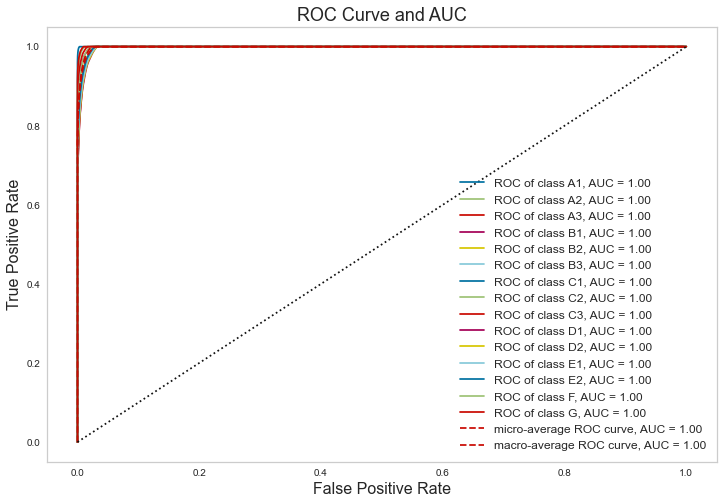

In [14]:
from yellowbrick.classifier import ROCAUC
plt.figure(figsize=(12,8))
plt.title("ROC Curve and AUC", fontsize=18)
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
visualizer = ROCAUC(model_dt, classes=classes, colors=['#009E73', 'red'])
visualizer.fit(X_train, y_train)
visualizer.score(X_train, y_train)
plt.legend(prop={'size': 12})
#plt.legend()
plt.grid(False)